# machine_learning_with_python 
### Regression project

##### For this project, we have collected data on approximately 4000 apartments in Tehran(Capital of Iran). All data is completely real. We want to estimate the price in dollars using the features of this dataset

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

### Reading the data in
#### The data is stored in the file housePrice.csv.The building specifications include the following:
#### - Area of ​​the house in meters (Area)
#### - Number of bedrooms (Room)
#### - Parking or not (Parking)
#### - Warehouse or not (Warehouse)
#### - Elevator or not (Elevator)
#### - Address of the area (Address)
#### - Price in dollars (Price(USD))

In [33]:

df = pd.read_csv(r".\data\housePrice.csv")   # Read cvs from  \data folder and write in df DataFrame
df = df.rename(columns = {'Price(USD)' : 'Price_USD' })
df.head()                                    # Show DataFrame head

,Area,Room,Parking,Warehouse,Elevator,Address,Price_USD
0,63.0,1,True,True,True,Shahran,61666.67
1,60.0,1,True,True,True,Shahran,61666.67
2,79.0,2,True,True,True,Pardis,18333.33
3,95.0,2,True,True,True,Shahrake Qods,30083.33
4,123.0,2,True,True,True,Shahrake Gharb,233333.33


### Isolating incorrect data
##### Separating incorrect data and creating a data with correct values, such as removing apartments without addresses or abnormal area , etc.

In [34]:
df.isnull().sum() # shows number of null column

Area          0
Room          0
Parking       0
Warehouse     0
Elevator      0
Address      23
Price_USD     0
dtype: int64

In [3]:
# clean data
df = df.dropna()                                          # Separating NaN columns rows
df = df.query('Area < 200 & Area > 10', inplace = False) # Separating Areas larger than 10 less Than 1000 from a DataFrame
df = df.query('Room < 10 & Room > 0', inplace = False) # Separating Room Larger Than 0 and less than 10 from a DataFrame
df = df[(df.Parking == False) | (df.Parking == True)]     # Discard data with incorrect parking specifications (neither true nor false)
df = df[(df.Warehouse == False) | (df.Warehouse == True)] # Discard data with incorrect Warehouse specifications (neither true nor false)
df = df[(df.Elevator == False) | (df.Elevator == True)]   # Discard data with incorrect Elevator specifications (neither true nor false)
df = df.query('Price_USD > 1000', inplace = False) # Separating Price_USD Less Than 1000 from a DataFrame
df

,Area,Room,Parking,Warehouse,Elevator,Address,Price_USD
0,63.0,1,True,True,True,Shahran,61666.67
1,60.0,1,True,True,True,Shahran,61666.67
2,79.0,2,True,True,True,Pardis,18333.33
3,95.0,2,True,True,True,Shahrake Qods,30083.33
4,123.0,2,True,True,True,Shahrake Gharb,233333.33
...,...,...,...,...,...,...,...
3474,86.0,2,True,True,True,Southern Janatabad,116666.67
3475,83.0,2,True,True,True,Niavaran,226666.67
3476,75.0,2,False,False,False,Parand,12166.67
3477,105.0,2,True,True,True,Dorous,186666.67


##### At this stage, we try to test different methods, without using our own experiences, to test different regression methods on this data to find the best solution.

### Simple Linear Regression

##### Let's first have a descriptive exploration on our data.

In [4]:
df.describe(include='all')

,Area,Room,Parking,Warehouse,Elevator,Address,Price_USD
count,3209.000000,3209.000000,3209,3209,3209,3209,3.209000e+03
unique,NaN,NaN,2,2,2,187,NaN
top,NaN,NaN,True,True,True,Punak,NaN
freq,NaN,NaN,2702,2938,2549,161,NaN
mean,93.562792,1.992521,NaN,NaN,NaN,NaN,1.317557e+05
std,34.008936,0.652976,NaN,NaN,NaN,NaN,1.305603e+05
min,32.000000,1.000000,NaN,NaN,NaN,NaN,1.833330e+03
25%,67.000000,2.000000,NaN,NaN,NaN,NaN,4.383333e+04
50%,87.000000,2.000000,NaN,NaN,NaN,NaN,8.733333e+04
75%,113.000000,2.000000,NaN,NaN,NaN,NaN,1.700000e+05


In [5]:
# mask for Area
msk = np.random.rand(len(df)) < 0.8
train = df[msk]     # mask for 80%
test = df[~msk]     #mask for 20%

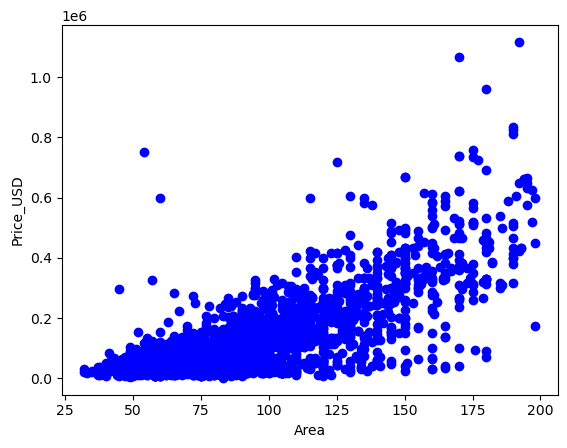

In [6]:
plt.scatter(train.Area, train.Price_USD,  color='blue') # 80% data
plt.xlabel("Area")
plt.ylabel("Price_USD")
plt.show()

In [7]:
from sklearn import linear_model     # import linear models from sklearn. Read https://scikit-learn.org/stable/ for learn more
regr = linear_model.LinearRegression()        # linear model -- Regression
train_x = np.asanyarray(train[['Area']])      # data to x array
train_y = np.asanyarray(train[['Price_USD']])    # data to y array
regr.fit (train_x, train_y)                         # Regression tetas Calculation
# The coefficients
print ('Coefficients: ', regr.coef_)     # teta0
print ('Intercept: ',regr.intercept_)    # teta1

Coefficients:  [[2829.49957156]]
Intercept:  [-133493.01304687]


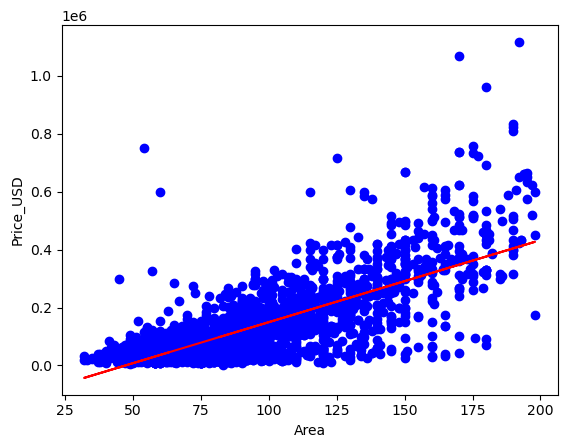

In [8]:
plt.scatter(train.Area, train.Price_USD, color='blue') # scatter from train ENGINESIZE and CO2EMISSIONS blue color 
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')  # draw a line teta1x + teta0
plt.xlabel("Area")
plt.ylabel("Price_USD")
plt.show()

In [9]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['Area']])         # Test array x
test_y = np.asanyarray(test[['Price_USD']])       # Test array y
test_y_ = regr.predict(test_x)                       # predicted y 

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))     
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_) )     # Result is bad.

Mean absolute error: 60612.77
Residual sum of squares (MSE): 7594035874.94
R2-score: 0.55


#### Now we divide/scale Area and room columns  and  will see its effect on R2-score

In [10]:
max_area = df.loc[df['Area'].idxmax()]
max_room = df.loc[df['Room'].idxmax()]

df['Area'] = df['Area'].div(max_area['Area'])  # divide/scale Area
df['Room'] = df['Room'].div(max_room['Room'])  # divide/scale Room
df 

,Area,Room,Parking,Warehouse,Elevator,Address,Price_USD
0,0.318182,0.2,True,True,True,Shahran,61666.67
1,0.303030,0.2,True,True,True,Shahran,61666.67
2,0.398990,0.4,True,True,True,Pardis,18333.33
3,0.479798,0.4,True,True,True,Shahrake Qods,30083.33
4,0.621212,0.4,True,True,True,Shahrake Gharb,233333.33
...,...,...,...,...,...,...,...
3474,0.434343,0.4,True,True,True,Southern Janatabad,116666.67
3475,0.419192,0.4,True,True,True,Niavaran,226666.67
3476,0.378788,0.4,False,False,False,Parand,12166.67
3477,0.530303,0.4,True,True,True,Dorous,186666.67


Coefficients:  [[545379.39557045]]
Intercept:  [-126848.25847733]


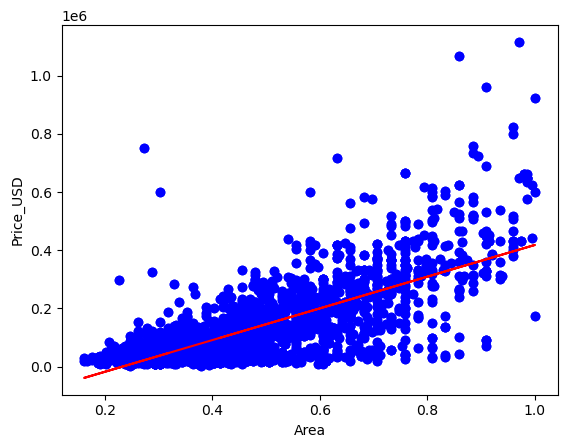

In [11]:
# mask for Area
msk = np.random.rand(len(df)) < 0.8
train = df[msk]     # mask for 80%
test = df[~msk]     #mask for 20%
plt.scatter(train.Area, train.Price_USD,  color='blue') # 80% data
plt.xlabel("Area")
plt.ylabel("Price_USD")
from sklearn import linear_model     # import linear models from sklearn. Read https://scikit-learn.org/stable/ for learn more
regr = linear_model.LinearRegression()        # linear model -- Regression
train_x = np.asanyarray(train[['Area']])      # data to x array
train_y = np.asanyarray(train[['Price_USD']])    # data to y array
regr.fit (train_x, train_y)                         # Regression tetas Calculation
# The coefficients
print ('Coefficients: ', regr.coef_)     # teta0
print ('Intercept: ',regr.intercept_)    # teta1
plt.scatter(train.Area, train.Price_USD,  color='blue') # scatter from train ENGINESIZE and CO2EMISSIONS blue color 
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')  # draw a line teta1x + teta0
plt.xlabel("Area")
plt.ylabel("Price_USD")
plt.show()

In [12]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['Area']])         # Test array x
test_y = np.asanyarray(test[['Price_USD']])       # Test array y
test_y_ = regr.predict(test_x)                       # predicted y 

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))     
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_) )     # Result is bad We had no change.

Mean absolute error: 60672.94
Residual sum of squares (MSE): 7582030255.25
R2-score: 0.61


##### These results show that simple linear regression using Area does not provide a good model for price prediction. We can test the Address column.

In [13]:

df["address_code"], uniques = pd.factorize(df["Address"]) # Suppose df is your DataFrame with a column 'address'
mapping = dict(enumerate(uniques))   # Optionally store the mapping

max_address_code = df.loc[df['address_code'].idxmax()]
df['address_code'] = df['address_code'].div(max_address_code['address_code']) # divide/scale address_code

df

,Area,Room,Parking,Warehouse,Elevator,Address,Price_USD,address_code
0,0.318182,0.2,True,True,True,Shahran,61666.67,0.000000
1,0.303030,0.2,True,True,True,Shahran,61666.67,0.000000
2,0.398990,0.4,True,True,True,Pardis,18333.33,0.005376
3,0.479798,0.4,True,True,True,Shahrake Qods,30083.33,0.010753
4,0.621212,0.4,True,True,True,Shahrake Gharb,233333.33,0.016129
...,...,...,...,...,...,...,...,...
3474,0.434343,0.4,True,True,True,Southern Janatabad,116666.67,0.086022
3475,0.419192,0.4,True,True,True,Niavaran,226666.67,0.413978
3476,0.378788,0.4,False,False,False,Parand,12166.67,0.145161
3477,0.530303,0.4,True,True,True,Dorous,186666.67,0.236559


In [14]:
# mask for Address
msk = np.random.rand(len(df)) < 0.8
train = df[msk]     # mask for 80%
test = df[~msk]     #mask for 20%

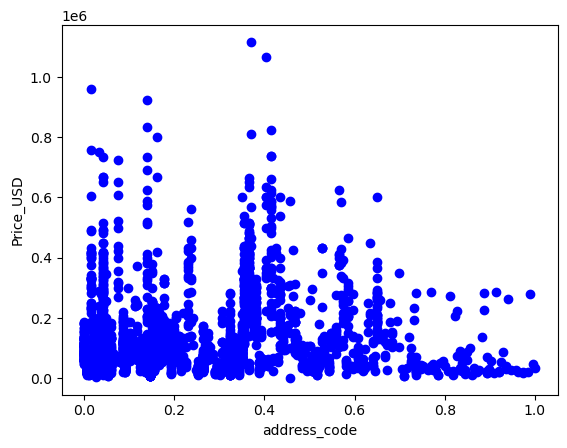

In [15]:
plt.scatter(train.address_code, train.Price_USD,  color='blue') # 80% data
plt.xlabel("address_code")
plt.ylabel("Price_USD")
plt.show()

In [16]:
from sklearn import linear_model     # import linear models from sklearn. Read https://scikit-learn.org/stable/ for learn more
regr = linear_model.LinearRegression()        # linear model -- Regression
train_x = np.asanyarray(train[['address_code']])      # data to x array
train_y = np.asanyarray(train[['Price_USD']])    # data to y array
regr.fit (train_x, train_y)                         # Regression tetas Calculation
# The coefficients
print ('Coefficients: ', regr.coef_)     # teta0
print ('Intercept: ',regr.intercept_)    # teta1

Coefficients:  [[85431.25274929]]
Intercept:  [114655.14209574]


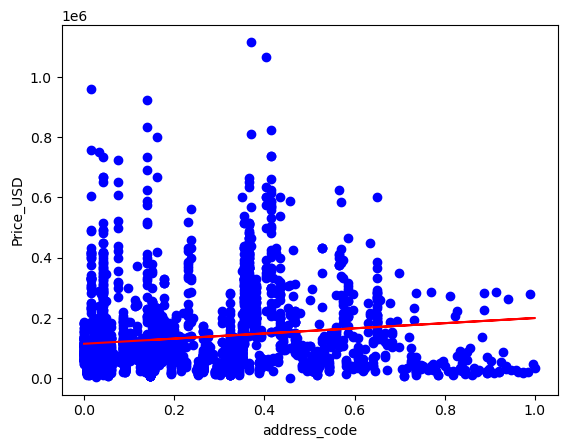

In [17]:
plt.scatter(train.address_code, train.Price_USD,  color='blue') # scatter from train ENGINESIZE and CO2EMISSIONS blue color 
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')  # draw a line teta1x + teta0
plt.xlabel("address_code")
plt.ylabel("Price_USD")
plt.show()

In [18]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['address_code']])         # Test array x
test_y = np.asanyarray(test[['Price_USD']])       # Test array y
test_y_ = regr.predict(test_x)                       # predicted y 

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))     
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_) )     # Above 0.52 is very bad.

Mean absolute error: 84688.44
Residual sum of squares (MSE): 12969884790.83
R2-score: -0.02


##### These results show that simple linear regression using Address does not provide a good model for price prediction and is evry bad. So it seems that, as we suspected from the beginning, we cannot find a suitable model to predict apartment prices with simple linear regression through one column. So, the next step is to use multiple regression.

### Multiple Linear Regression

In [19]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [20]:
dfm = pd.read_csv(r".\data\housePrice.csv")   # Read cvs from  \data folder and write in df DataFrame
dfm = dfm.rename(columns = {'Price(USD)' : 'Price_USD' })
dfm.head()                                    # Show DataFrame head

,Area,Room,Parking,Warehouse,Elevator,Address,Price_USD
0,63.0,1,True,True,True,Shahran,61666.67
1,60.0,1,True,True,True,Shahran,61666.67
2,79.0,2,True,True,True,Pardis,18333.33
3,95.0,2,True,True,True,Shahrake Qods,30083.33
4,123.0,2,True,True,True,Shahrake Gharb,233333.33


##### Separating incorrect data and creating a data with correct values, such as removing apartments without addresses or abnormal area , etc.

In [21]:
# clean data
dfm = dfm.dropna()                                          # Separating NaN columns rows
dfm = dfm.query('Area < 200 & Area > 10', inplace = False) # Separating Areas larger than 10 less Than 1000 from a DataFrame
dfm = dfm.query('Room < 10 & Room > 0', inplace = False) # Separating Room Larger Than 0 and less than 10 from a DataFrame
dfm = dfm[(dfm.Parking == False) | (dfm.Parking == True)]     # Discard data with incorrect parking specifications (neither true nor false)
dfm = dfm[(dfm.Warehouse == False) | (dfm.Warehouse == True)] # Discard data with incorrect Warehouse specifications (neither true nor false)
dfm = dfm[(dfm.Elevator == False) | (dfm.Elevator == True)]   # Discard data with incorrect Elevator specifications (neither true nor false)
dfm = dfm.query('Price_USD > 1000', inplace = False) # Separating Price_USD Less Than 1000 from a DataFrame
dfm

,Area,Room,Parking,Warehouse,Elevator,Address,Price_USD
0,63.0,1,True,True,True,Shahran,61666.67
1,60.0,1,True,True,True,Shahran,61666.67
2,79.0,2,True,True,True,Pardis,18333.33
3,95.0,2,True,True,True,Shahrake Qods,30083.33
4,123.0,2,True,True,True,Shahrake Gharb,233333.33
...,...,...,...,...,...,...,...
3474,86.0,2,True,True,True,Southern Janatabad,116666.67
3475,83.0,2,True,True,True,Niavaran,226666.67
3476,75.0,2,False,False,False,Parand,12166.67
3477,105.0,2,True,True,True,Dorous,186666.67


#### Now we divide/scale Area and room columns  and  will see its effect on R2-score

In [22]:
max_area = dfm.loc[dfm['Area'].idxmax()]
max_room = dfm.loc[dfm['Room'].idxmax()]

dfm['Area'] = dfm['Area'].div(max_area['Area'])  # divide/scale Area
dfm['Room'] = dfm['Room'].div(max_room['Room'])  # divide/scale Room

dfm["address_code"], uniques = pd.factorize(dfm["Address"]) # Suppose df is your DataFrame with a column 'address'
mapping = dict(enumerate(uniques))   # Optionally store the mapping

max_address_code = dfm.loc[dfm['address_code'].idxmax()]
dfm['address_code'] = dfm['address_code'].div(max_address_code['address_code']) # divide/scale address_code

dfm

,Area,Room,Parking,Warehouse,Elevator,Address,Price_USD,address_code
0,0.318182,0.2,True,True,True,Shahran,61666.67,0.000000
1,0.303030,0.2,True,True,True,Shahran,61666.67,0.000000
2,0.398990,0.4,True,True,True,Pardis,18333.33,0.005376
3,0.479798,0.4,True,True,True,Shahrake Qods,30083.33,0.010753
4,0.621212,0.4,True,True,True,Shahrake Gharb,233333.33,0.016129
...,...,...,...,...,...,...,...,...
3474,0.434343,0.4,True,True,True,Southern Janatabad,116666.67,0.086022
3475,0.419192,0.4,True,True,True,Niavaran,226666.67,0.413978
3476,0.378788,0.4,False,False,False,Parand,12166.67,0.145161
3477,0.530303,0.4,True,True,True,Dorous,186666.67,0.236559


In [23]:
# mask for Address
msk = np.random.rand(len(dfm)) < 0.8
train = dfm[msk]     # mask for 80%
test = dfm[~msk]     #mask for 20%

#### Now we can start multiple linear regression. In first test with Area, address_code

In [24]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['Area','address_code']]) # x1,x2
y = np.asanyarray(train[['Price_USD']])
regr.fit (x, y)
# The coefficients
print ('Coefficients: ', regr.coef_)   # teta matrix
print ('Intercept:', regr.intercept_)  # teta0

Coefficients:  [[553088.15021895  32834.78091496]]
Intercept: [-136464.82151727]


In [25]:
x = np.asanyarray(test[['Area','address_code']]) # xs
y = np.asanyarray(test[['Price_USD']])    # ys
y_hat= regr.predict(x)            # predict ys

print("Residual sum of squares: %.2f"
      % np.mean((y_hat - y) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x, y))      # isn't good yet

Residual sum of squares: 8684922773.41
Variance score: 0.54


#### Results isn't good yet. In second test we can use Area,address_code,Room

In [26]:
# mask for Address
msk = np.random.rand(len(dfm)) < 0.8
train = dfm[msk]     # mask for 80%
test = dfm[~msk]     #mask for 20%

In [27]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['Area','address_code', 'Room']]) # x1,x2,x3
y = np.asanyarray(train[['Price_USD']])
regr.fit (x, y)
# The coefficients
print ('Coefficients: ', regr.coef_)   # teta matrix
print ('Intercept:', regr.intercept_)  # teta0

Coefficients:  [[ 630979.1102779    41436.14069063 -132969.9929079 ]]
Intercept: [-123252.24495295]


In [28]:
x = np.asanyarray(test[['Area','address_code','Room']]) # xs
y = np.asanyarray(test[['Price_USD']])    # ys
y_hat= regr.predict(x)            # predict ys

print("Residual sum of squares: %.2f"
      % np.mean((y_hat - y) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x, y))      # isn't good yet

Residual sum of squares: 8169093383.25
Variance score: 0.55


#### Results isn't good yet. In second test we can use Area,address_code,Room,Parking,Elevator,Warehouse

In [29]:
# mask for Address
msk = np.random.rand(len(dfm)) < 0.8
train = dfm[msk]     # mask for 80%
test = dfm[~msk]     #mask for 20%

In [30]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['Area','address_code', 'Room','Parking', 'Elevator', 'Warehouse']]) # x1,x2,x3,x4,x5
y = np.asanyarray(train[['Price_USD']])
regr.fit (x, y)
# The coefficients
print ('Coefficients: ', regr.coef_)   # teta matrix
print ('Intercept:', regr.intercept_)  # teta0


Coefficients:  [[ 621159.14822626   35665.10575833 -138739.1838529    21874.87955361
     3886.34785522    9158.83321815]]
Intercept: [-145225.50155321]


In [31]:
x = np.asanyarray(test[['Area','address_code','Room','Parking', 'Elevator', 'Warehouse']]) # xs
y = np.asanyarray(test[['Price_USD']])    # ys
y_hat= regr.predict(x)            # predict ys

print("Residual sum of squares: %.2f"
      % np.mean((y_hat - y) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x, y))      # isn't good yet

Residual sum of squares: 7729191711.94
Variance score: 0.55


#### result isn't good in multiple linear regression!!! maybe non linear regression